# matplotlibでアニメーション

[matplotlib.animation](https://matplotlib.org/3.2.1/api/animation_api.html)を使ったアニメーションを試してみる。

###### 参考にしたページ等
* [https://qiita.com/msrks/items/e264872efa062c7d6955](https://qiita.com/msrks/items/e264872efa062c7d6955)
* [https://matplotlib.org/3.2.1/gallery/index.html#animation](https://matplotlib.org/3.2.1/gallery/index.html#animation)


### 1.とりあえず

とりあえずmatplotlibの公式ページの[例](https://matplotlib.org/3.2.1/gallery/animation/animate_decay.html#sphx-glr-gallery-animation-animate-decay-py)と上記ページを参考にpngファイルを作ってみる。

使用する機能は[matplotlib.animation.FuncAnimation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib-animation-funcanimation)クラス,
ほかにも[matplotlib.animation.Artistanimation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.ArtistAnimation.html#matplotlib-animation-artistanimation)クラスもあるようだけど、とりあえずまつこちらから。


Gifの保存はその中は[matplotliv.animation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.Animation.html#matplotlib-animation-animation)クラスの[save](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.Animation.html#matplotlib.animation.Animation.save)メソッド(anacondaのフルスペック環境なんであんまり気にならないが、、)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


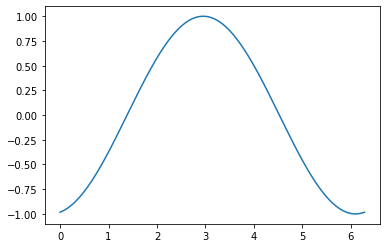

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 10))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=50)


ani.save("anim.gif", writer="imagemagick")

#plt.show()

出来上がったアニメメーションGIFファイル
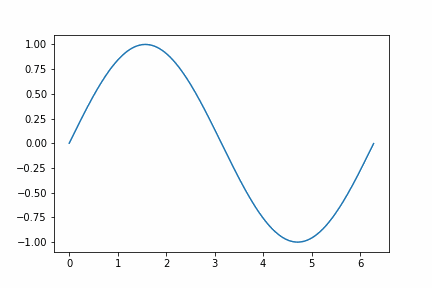

FuncAnimationはlineという変数を返す関数を引数にしてるがこのlineは[matplotliv.pyplot.plot()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib-pyplot-plot)の返り値をもとにしている。
plot()のリファランスによると、は[matplotlib.lines.Line2D](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)クラスのリストを返すとのこと。

どうやら以下の構文(,付き代入)は渡されたリストの要素のLine2Dクラスのインスタンスをlineに渡すようである。

``` python
line, = ax.plot(x, np.sin(x))
```


line2Dをもう少し調べてみる


In [2]:
line

In [3]:
dir(line)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_clipon',
 '_clippath',
 '_color',
 '_contains',
 '_dashOffset',
 '_dashSeq',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_get_clipping_extent_bbox',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_invalidx',
 '_invalidy',
 '_is_sorted',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfacecolor',
 '_markerfacecoloralt',
 '_markersize',
 '_markevery',
 '_mouseove

クラスは[matplotlib.lines.Line2D](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)でx,yのデータを持っている模様
[get_xdata()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.get_xdata),[get_ydata()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.get_xydata)を試してみる

In [4]:
x=line.get_xdata()
y=line.get_ydata()

In [5]:
type(x)

numpy.ndarray

In [6]:
x.ndim

1

In [7]:
x.shape

(629,)

In [8]:
type(y)

numpy.ndarray

In [9]:
y.ndim

1

In [10]:
y.shape

(629,)

xdata,ydataは629個の1次元ndarrayであることがわかった。(ある程度読めていただが、、)